In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Preprocessing (2 marks):

Load the California Housing dataset using the fetch_california_housing function from sklearn. Convert the dataset into a pandas DataFrame for easier handling. Handle missing values (if any) and perform necessary feature scaling (e.g., standardization). Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [113]:
#Load the California Housing dataset using the fetch_california_housing function from sklearn. 
from sklearn.datasets import fetch_california_housing

In [114]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [115]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [116]:
# to get the basic information about the dataset(datatype,no:of columns,rows etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [117]:
# to find the duplicates in the data set.
df.duplicated().sum()

0

There is no duplicated values in this dataset.

In [119]:
# to check the misssing values in the dataset.
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

The data do not have any missing values.

In [121]:
#to analyse the statistical measures of the dataset.
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


we can't see major difference between "mean" and "median" of different columns except 'Population' and 'AveOccup'. All others have minor difference between mean and median.The difference may be the indication of 'outliers'.

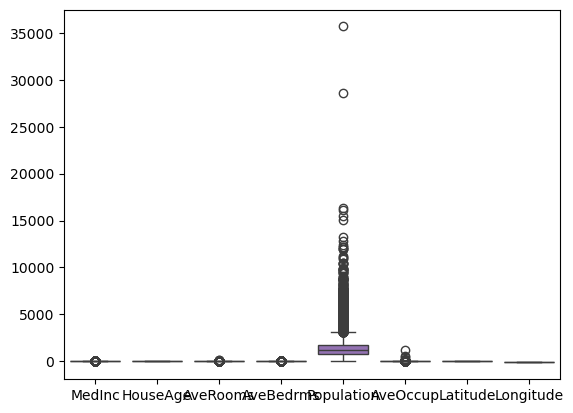

In [123]:
# to check the presence of outliers.
sns.boxplot(df)
plt.show()

we can see some outliers on 'Population' and 'AveOccup' columns.

In [125]:
# to check the skewness of the data
skewness=df.skew()
skewness

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64

The data is possitively skewed in most of the columns.

In [127]:
# to find the outliers using IQR method.
numericals=df.select_dtypes("number")
for column in numericals:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_whisker=Q1-1.5*IQR
    upper_whisker=Q3+1.5*IQR
    outliers=df[(df[column]<lower_whisker) | (df[column]>upper_whisker)]

print(outliers)

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
Index: []


The data do not contain any outliers. that is why we got an empty dataframe for outliers.



In [129]:
from sklearn.model_selection import train_test_split

In [130]:
data.target # To find the 'target' column

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [131]:
df["Target"]=data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [132]:
#to find the correlation between the target and other features
corr=df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


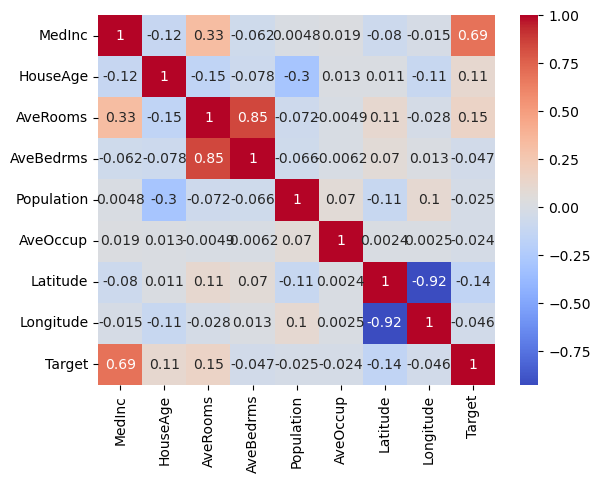

In [133]:
# drawing a heatmap based on correlation
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

target has a strong possitive correlation with 'MedInc' compared to other features.

In [135]:
X=df.drop("Target",axis=1) #features
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [136]:
y=df["Target"]
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [137]:
# feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [138]:
X_scaled=std_scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y)

In [140]:
X_train.shape

(15480, 8)

In [141]:
X_test.shape

(5160, 8)

In [142]:
y_train.shape

(15480,)

In [143]:
y_test.shape

(5160,)

### Regression Algorithm Implementation (5 marks):
 Implement the following regression algorithms:


1.Linear Regression
2.Decision Tree Regressor
3.Random Forest Regressor
4.Gradient Boosting Regressor
5.Support Vector Regressor (SVR)
 For each algorithm:
* Provide a brief explanation of how it works.
* Explain why it might be suitable for this dataset.


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [147]:
#.Linear Regression
lnreg=LinearRegression()
lnreg.fit(X_train,y_train)

LinearRegression()

How it Works:Linear Regression models the relationship between the independent variables (features) and the dependent variable (target) using a straight-line equation

Suitability :Provides a simple and interpretable model,Useful if the relationship between features and housing prices is linear,Computationally efficient for large datasets,However, it may underperform if relationships are non-linear or interactions between features are significant.

In [150]:
lnreg_y_pred=lnreg.predict(X_test)
lnreg_y_pred

array([ 1.62277137,  2.07208686,  3.75849325, ..., -0.17370189,
        2.76088081,  0.56138111])

In [151]:
# Decision Tree Regressor
dtreg=DecisionTreeRegressor()
dtreg.fit(X_train,y_train)

DecisionTreeRegressor()

How it Work :A Decision Tree is a supervised learning algorithm used for classification and regression tasks.The structure resembles a tree, with nodes representing decisions, branches representing choices, and leaves representing outcomes or predictions. 

Suitability:Handles non-linearity well, unlike Linear Regression,
Can automatically capture interactions between features,
Prone to overfitting if not pruned or regularized.

In [152]:
dtreg_y_pred=dtreg.predict(X_test)
dtreg_y_pred

array([3.643  , 1.613  , 5.00001, ..., 0.717  , 2.091  , 0.592  ])

In [153]:
# Random Forest Regressor
rfreg=RandomForestRegressor()
rfreg.fit(X_train,y_train)

RandomForestRegressor()

How it Works:
Random Forest is an ensemble learning method that builds multiple Decision Trees and averages their predictions to improve accuracy and reduce overfitting.  Each tree is built on a random subset of data and features.

Suitability:Reduces overfitting compared to a single Decision Tree,
Handles non-linear relationships effectively.

In [154]:
rfreg_y_pred=rfreg.predict(X_test)
rfreg_y_pred

array([1.60396  , 1.6796304, 4.2902814, ..., 0.7649   , 2.28675  ,
       0.8295   ])

In [155]:
# Gradient Boosting Regressor
gbreg=GradientBoostingRegressor()
gbreg.fit(X_train,y_train)

GradientBoostingRegressor()

How it Works:
Gradient Boosting is another ensemble method that builds Decision Trees sequentially, where each new tree corrects the errors of the previous one. It minimizes the loss function by iteratively improving predictions.

Suitability:More accurate than Random Forest in many cases,
Works well with complex and structured datasets.

In [156]:
gbreg_y_pred=gbreg.predict(X_test)
gbreg_y_pred

array([1.54459941, 1.43303529, 4.17139772, ..., 0.85930897, 2.47810458,
       0.85688079])

In [157]:
# Support Vector Regressor (SVR) 
svreg=SVR()
svreg.fit(X_train,y_train)

SVR()

How it Works:
SVC uses a set of labeled training examples to find a decision boundary that separates the data points into different classes. The decision boundary is represented as a linear function, and the goal is to find the boundary that maximizes the separation between the classes.

Suitability:SVC is commonly used in image recognition, text classification, and medical diagnosis. It's effective for complex or non-linear datasets. Related algorithms

In [158]:
svreg_y_pred=svreg.predict(X_test)
svreg_y_pred

array([1.42492133, 1.17079266, 4.29118707, ..., 0.71522188, 2.41940644,
       0.79466338])

In [159]:
y_test

19081    1.66200
13955    0.87500
18070    5.00001
5729     3.66700
10500    3.00000
          ...   
13478    0.96800
10374    2.23300
18825    0.58600
20432    2.14700
18735    1.00600
Name: Target, Length: 5160, dtype: float64

### Model Evaluation and Comparison (2 marks):


*Evaluate the performance of each algorithm using the following metrics: 
Mean Squared Error (MSE,) 
Mean Absolute Error (MA,E )
R-squared Score (
 R* ²)
Compare the results of all models and identi  The best-performing algorithm with justification.  
The worst-performing algorithm with reasoning.
fy:


In [216]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [221]:
# Mean Squared Error (MSE)
lnreg_MSE=mean_squared_error(y_test,lnreg_y_pred)
dtreg_MSE=mean_squared_error(y_test,dtreg_y_pred)
rfreg_MSE=mean_squared_error(y_test,rfreg_y_pred)
gbreg_MSE=mean_squared_error(y_test,gbreg_y_pred)
svreg_MSE=mean_squared_error(y_test,svreg_y_pred)

print("Mean Squared Error-Linear Regression:",lnreg_MSE)
print("Mean Squared Error-Decision Tree Regressor:",dtreg_MSE)
print("Mean Squared Error-Random Forest Regressor:",rfreg_MSE)
print("Mean Squared Error-Gradient Boosting Regressor:",gbreg_MSE)
print("Mean Squared Error-Support Vector Regressor:",svreg_MSE)

Mean Squared Error-Linear Regression: 0.5393419450801853
Mean Squared Error-Decision Tree Regressor: 0.5298058055003876
Mean Squared Error-Random Forest Regressor: 0.27103488058631076
Mean Squared Error-Gradient Boosting Regressor: 0.2942426785201213
Mean Squared Error-Support Vector Regressor: 0.3610276182571849


In [223]:
# Mean Absolute Error (MAE)
lnreg_MAE=mean_absolute_error(y_test,lnreg_y_pred)
dtreg_MAE=mean_absolute_error(y_test,dtreg_y_pred)
rfreg_MAE=mean_absolute_error(y_test,rfreg_y_pred)
gbreg_MAE=mean_absolute_error(y_test,gbreg_y_pred)
svreg_MAE=mean_absolute_error(y_test,svreg_y_pred)

print("Mean Absolute Error-Linear Regression:",lnreg_MAE)
print("Mean Absolute Error-Decision Tree Regressor:",dtreg_MAE)
print("Mean Absolute Errorr-Random Forest Regressor:",rfreg_MAE)
print("Mean Absolute Error-Gradient Boosting Regressor:",gbreg_MAE)
print("Mean Absolute Error-Support Vector Regressor:",svreg_MAE)

Mean Absolute Error-Linear Regression: 0.536671747215462
Mean Absolute Error-Decision Tree Regressor: 0.47211515503875967
Mean Absolute Errorr-Random Forest Regressor: 0.3387799948449614
Mean Absolute Error-Gradient Boosting Regressor: 0.3721243019505785
Mean Absolute Error-Support Vector Regressor: 0.3993230440359593


In [229]:
#  R-squared Score ( R*²)
lnreg_r2_score=r2_score(y_test,lnreg_y_pred)
dtreg_r2_score=r2_score(y_test,dtreg_y_pred)
rfreg_r2_score=r2_score(y_test,rfreg_y_pred)
gbreg_r2_score=r2_score(y_test,gbreg_y_pred)
svreg_r2_score=r2_score(y_test,svreg_y_pred)

print("R-squared Score-Linear Regression:",lnreg_r2_score)
print("R-squared Score-Decision Tree Regressor:",dtreg_r2_score)
print("R-squared Score-Random Forest Regressor:",rfreg_r2_score)
print("R-squared Score-Gradient Boosting Regressor:",gbreg_r2_score)
print("R-squared Score-Support Vector Regressor:",svreg_r2_score)

R-squared Score-Linear Regression: 0.5973265456409298
R-squared Score-Decision Tree Regressor: 0.6044462408563214
R-squared Score-Random Forest Regressor: 0.7976449771558896
R-squared Score-Gradient Boosting Regressor: 0.7803180025949078
R-squared Score-Support Vector Regressor: 0.7304562727064832


In [240]:
# Compare the results of all models and identify:
predictions={
    "Linear Regression": lnreg_y_pred,
    "Decision Tree Regressor":dtreg_y_pred,
    "Random Forest Regressor":rfreg_y_pred,
    "Gradient Boosting Regressor":gbreg_y_pred,
    "Support Vector Regresso":svreg_y_pred
}


# Initialize a dictionary to store metrics
results={
    "Model":[],
    "Mean Squared Error":[],
    "Mean Absolute Error":[],
    "R-squared Score":[]
    
}

# Compute metrics for each model
for model_name, y_pred in predictions.items():
    results["Model"].append(model_name)
    results["Mean Squared Error"].append(mean_squared_error(y_test,y_pred))
    results["Mean Absolute Error"].append(mean_absolute_error(y_test,y_pred))
    results["R-squared Score"].append(r2_score(y_test,y_pred))
results   

{'Model': ['Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor',
  'Support Vector Regresso'],
 'Mean Squared Error': [0.5393419450801853,
  0.5298058055003876,
  0.27103488058631076,
  0.2942426785201213,
  0.3610276182571849],
 'Mean Absolute Error': [0.536671747215462,
  0.47211515503875967,
  0.3387799948449614,
  0.3721243019505785,
  0.3993230440359593],
 'R-squared Score': [0.5973265456409298,
  0.6044462408563214,
  0.7976449771558896,
  0.7803180025949078,
  0.7304562727064832]}

In [242]:
#Convert results to a DataFrame
Results=pd.DataFrame(results)
Results

,Model,Mean Squared Error,Mean Absolute Error,R-squared Score
0,Linear Regression,0.539342,0.536672,0.597327
1,Decision Tree Regressor,0.529806,0.472115,0.604446
2,Random Forest Regressor,0.271035,0.338780,0.797645
3,Gradient Boosting Regressor,0.294243,0.372124,0.780318
4,Support Vector Regresso,0.361028,0.399323,0.730456


In [244]:
#sort by R-squared Score
Results=Results.sort_values(by="R-squared Score",ascending=False)
Results

,Model,Mean Squared Error,Mean Absolute Error,R-squared Score
2,Random Forest Regressor,0.271035,0.338780,0.797645
3,Gradient Boosting Regressor,0.294243,0.372124,0.780318
4,Support Vector Regresso,0.361028,0.399323,0.730456
1,Decision Tree Regressor,0.529806,0.472115,0.604446
0,Linear Regression,0.539342,0.536672,0.597327


Mean Squared Error (MSE) – Lower values indicate better performance.

Mean Absolute Error (MAE) – Lower values indicate better accuracy.

R-squared Score (R²) – Higher values indicate better model fit.

From the results table, we can conclude that "Random Forest Regressor" is the best-performing algorithm. Because Random Forest Regressor model has the highest R-squared Score and lowest Mean Squared Error value and Mean Absolute Error value. 

The worst-performing algorithm is "Linear Regression model". Linear Regression has the lowest R-squared Score and highest Mean Squared Error and Mean Absolute Error values.